In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



## Pandas 

- Pandas is used for manipulation of tabular data
- read/write csv/txt/excel files
- The data with multiple columns is known as *dataframe* in pandas (normally when is 2D. cols x rows)
- When you work on 1D like all the values in a column, is normally known as a Serie

You can use `.describe()` to get a basic statistics of each column

In [33]:
df = pd.read_csv("training.csv")

df["IsBadBuy"] = df["IsBadBuy"].astype('category')

print(df.columns)

df.head()

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')


,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [34]:
df['IsBadBuy'].describe()

count     72983
unique        2
top           0
freq      64007
Name: IsBadBuy, dtype: int64

## Pandas filtering

1. you can get a single column by using the `[columnName]` 
2. you can convert the values of a column to Bool (True/False) by compering directly to a single scalar -> give you a Array of bools
3. You can use the previous array of bools to filter the full dataframe with `df[arrayOfBools]`, it will return a *new* dataframe

In [4]:
onlyBadOnes = df['IsBadBuy'] == 1
onlyBadOnes[:5]

0    False
1    False
2    False
3    False
4    False
Name: IsBadBuy, dtype: bool

In [5]:
bad = df[onlyBadOnes]
bad.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
12,13,1,12/14/2009,ADESA,2005,4,DODGE,CARAVAN GRAND FWD V6,SE,MINIVAN 3.3L,...,8523.0,10124.0,NaN,NaN,19638,33619,FL,5400.0,0,1623
25,26,1,12/21/2009,ADESA,2004,5,MERCURY,SABLE,LS,4D SEDAN LS PREMIUM,...,6600.0,8074.0,NaN,NaN,5546,33619,FL,4500.0,0,754
31,32,1,12/28/2009,ADESA,2002,7,FORD,EXPLORER 2WD V6,Spo,2D SUV 4.0L SPORT,...,5622.0,6773.0,NaN,NaN,19638,33619,FL,4900.0,0,1220
35,36,1,12/28/2009,ADESA,2001,8,FORD,WINDSTAR FWD V6,LX,PASSENGER 3.8L LX,...,4407.0,5530.0,NaN,NaN,19638,33619,FL,3600.0,0,2322
39,40,1,1/4/2010,ADESA,2005,5,FORD,MUSTANG V6,Bas,2D COUPE,...,11047.0,13224.0,NaN,NaN,19638,33619,FL,8500.0,0,728


## NaN managment

In [35]:
df.isnull().sum(axis = 0) ## how many not values we have for column

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [25]:
df['PRIMEUNIT'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PRIMEUNIT, dtype: object

In [26]:
df['PRIMEUNIT'].value_counts()#dropna=False)

NO     3357
YES      62
Name: PRIMEUNIT, dtype: int64

In [28]:
df = df.fillna({'PRIMEUNIT': 'NO'})

df['PRIMEUNIT'].value_counts()

NO     72921
YES       62
Name: PRIMEUNIT, dtype: int64

## Visualization

we are gonna use seaborn

https://seaborn.pydata.org/tutorial.html


Let's plot dots for MMRCurrentRetailAveragePrice and VehBCost

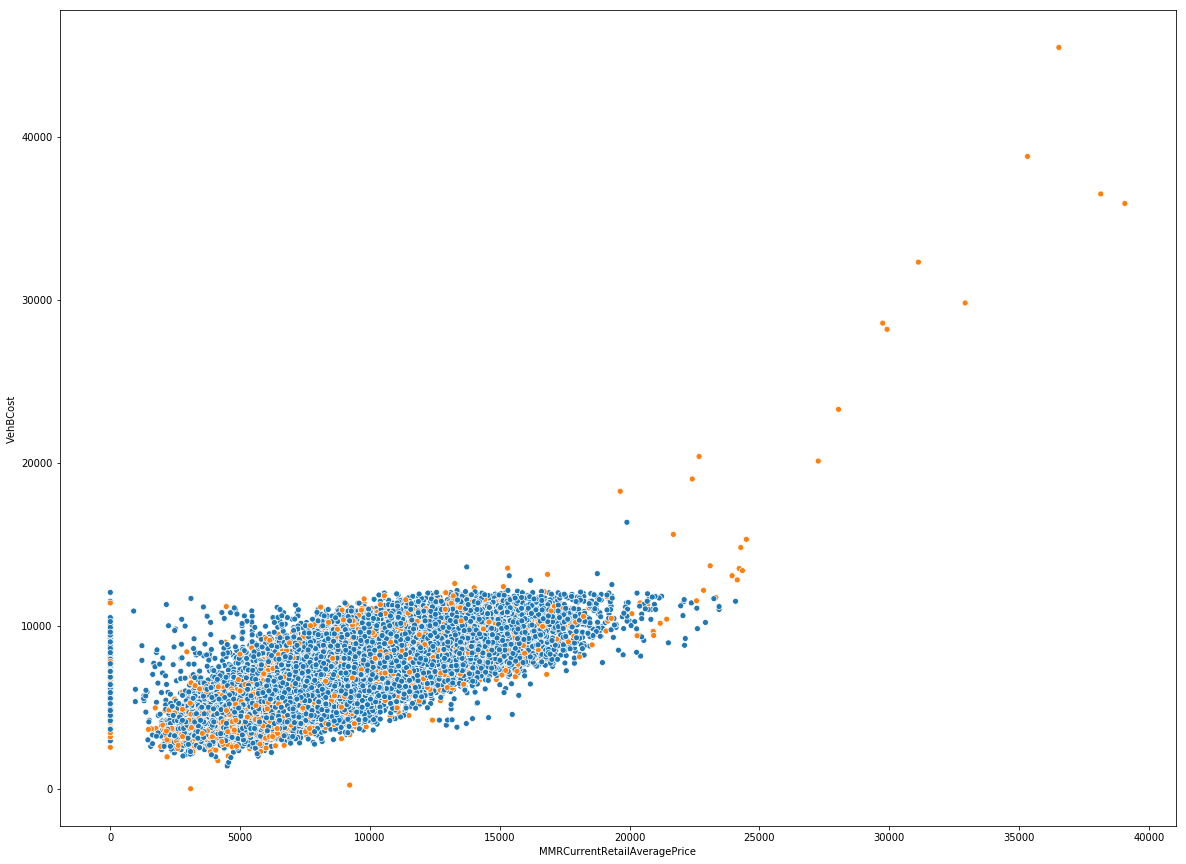

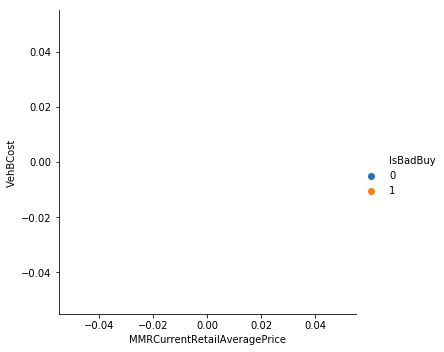

In [6]:
fig = plt.figure(figsize=(20,15))
ax=plt.subplot(111)
x = sns.relplot(x="MMRCurrentRetailAveragePrice", y="VehBCost", hue="IsBadBuy",data=df, ax=ax);


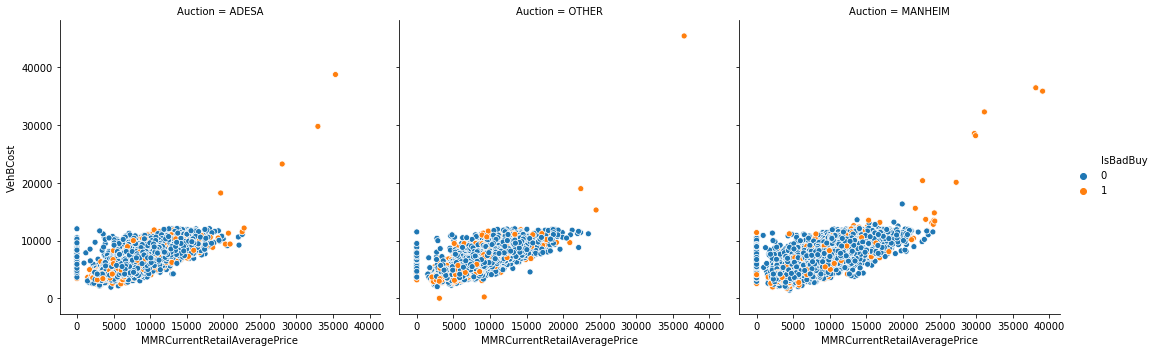

In [7]:
sns.relplot(x="MMRCurrentRetailAveragePrice", y="VehBCost", hue="IsBadBuy", col="Auction", data=df);

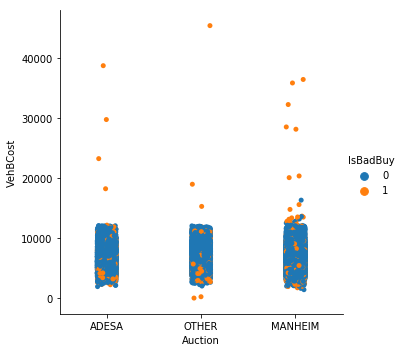

In [8]:
sns.catplot(x="Auction", y="VehBCost", hue="IsBadBuy", data=df);

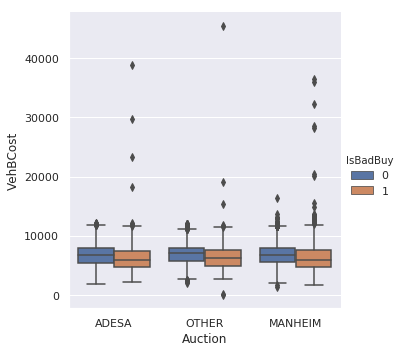

In [48]:
sns.catplot(x="Auction", y="VehBCost", hue="IsBadBuy", kind="box", data=df);

/home/kozko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


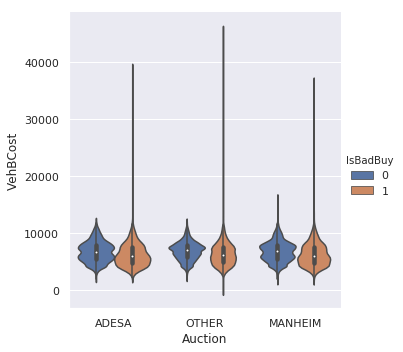

In [49]:
sns.catplot(x="Auction", y="VehBCost", hue="IsBadBuy", kind="violin", data=df);

/home/kozko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


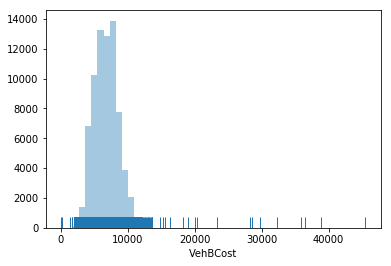

In [12]:
sns.distplot(df['VehBCost'], kde=False, rug=True);

In [53]:
#sns.pairplot(data=df, hue="IsBadBuy");

/home/kozko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/kozko/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kozko/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kozko/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


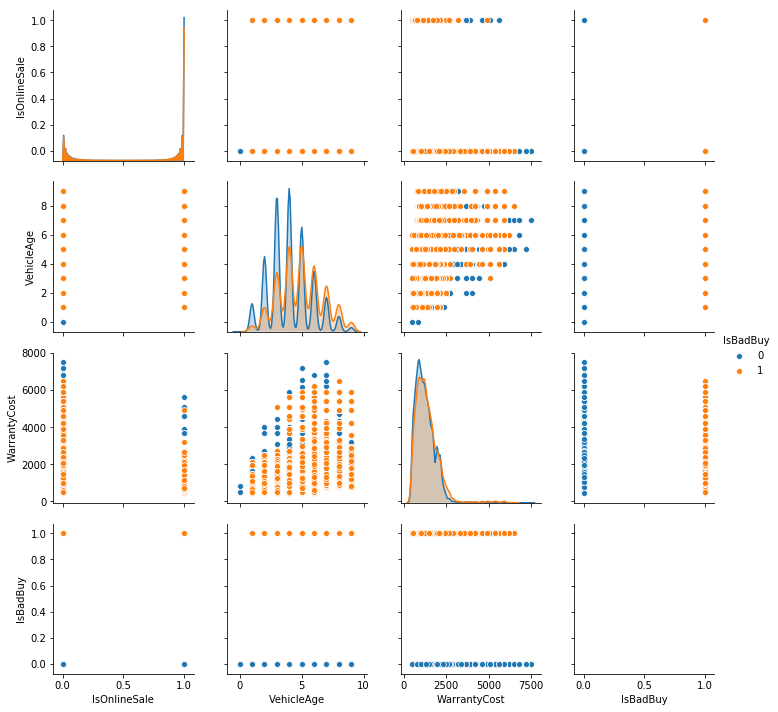

In [13]:
only_few_columns = df[['IsOnlineSale', 'VehicleAge', 'Transmission', 'WarrantyCost', 'IsBadBuy']].copy()
sns.pairplot(only_few_columns, hue="IsBadBuy");

## Kaggle submission sample

Here you can see how we can use a 

In [75]:
test_df = pd.read_csv("test.csv")
test_df.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [61]:
def isBadBuy(row):
    #print(row)
    cost = row['VehBCost']
    if cost > 20000:
        return 1
    else:
        return 0

prediction_isBadBuy = test_df.apply(isBadBuy, axis=1)

In [64]:
test_df['IsBadBuy'] = prediction_isBadBuy
test_df.describe()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,isBadBuy,IsBadBuy
count,48707.000000,48707.000000,48707.000000,46519.000000,48707.000000,48697.000000,48697.000000,48697.000000,48697.000000,48564.000000,48564.000000,48564.000000,48564.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000
mean,97378.396144,2005.331533,4.215801,1.462198,71576.351448,6134.883997,7393.486313,8550.143869,9920.585662,6112.367247,7382.808994,8812.130014,10195.801334,25432.898906,54198.092636,6760.866483,0.022009,1281.105755,0.000103,0.000103
std,14067.338432,1.730500,1.704778,0.516574,14487.934950,2453.918764,2715.515852,3130.915999,3361.101528,2427.325384,2682.991119,3062.179799,3285.030551,24137.133174,26053.831141,1757.034461,0.146715,612.003001,0.010131,0.010131
min,73015.000000,2001.000000,0.000000,1.000000,223.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,3106.000000,1625.000000,0.000000,462.000000,0.000000,0.000000
25%,85195.500000,2004.000000,3.000000,1.000000,62226.500000,4283.000000,5432.000000,6378.000000,7579.000000,4247.000000,5391.000000,6622.000000,7876.000000,17212.000000,32750.000000,5480.000000,0.000000,853.000000,0.000000,0.000000
50%,97378.000000,2005.000000,4.000000,1.000000,73412.000000,6115.000000,7308.000000,8495.000000,9881.000000,6050.000000,7280.000000,8749.000000,10136.000000,19638.000000,40509.000000,6730.000000,0.000000,1209.000000,0.000000,0.000000
75%,109560.500000,2007.000000,5.000000,2.000000,82419.500000,7755.000000,9044.000000,10666.000000,12184.000000,7677.000000,9028.000000,10869.250000,12374.000000,21973.000000,78219.000000,7935.000000,0.000000,1623.000000,0.000000,0.000000
max,121746.000000,2010.000000,9.000000,3.000000,114786.000000,27584.000000,30843.000000,32456.000000,35754.000000,27009.000000,30516.000000,31677.000000,36036.000000,99791.000000,98064.000000,56950.000000,1.000000,7498.000000,1.000000,1.000000


In [66]:
final_csv = test_df[['RefId', 'IsBadBuy']]
final_csv.head()

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0


In [76]:
final_csv.to_csv("prediction.csv", index=False)

In [77]:
!kaggle competitions submit -f "prediction.csv" -m "first assumption" DontGetKicked

100%|█████████████████████████████████████████| 402k/402k [00:03<00:00, 103kB/s]
Successfully submitted to Don't Get Kicked!